# Image Classification of 6 Classes(Multiclass) Using CNN

# Import Libraries

In [1]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential   
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

from keras.preprocessing import image  

# Reading Data

In [2]:
train_dir=r"C:\Users\sm983\Desktop\Capstone-2 projects\CNN_Intel_Classification\seg_train\seg_train"

# Specifying generic Parameters

In [3]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,       
    height_shift_range = 0.1,       
    horizontal_flip = True,         
    rescale = 1./255,               
    validation_split = 0.2          
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               
    validation_split = 0.2          
)

# Applying the generic parameters for Train data and Validation data

In [4]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,         
    target_size=(128, 128),        
    batch_size=64,               
    color_mode="grayscale",      
    class_mode="categorical",    
    subset="training"            
)


validation_generator = validation_datagen.flow_from_directory(
    directory=train_dir,         
    target_size=(128, 128),        
    batch_size=64,               
    color_mode="grayscale",     
    class_mode="categorical",   
    subset="validation"          
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


# Visualizing Image Batch with Corresponding Labels

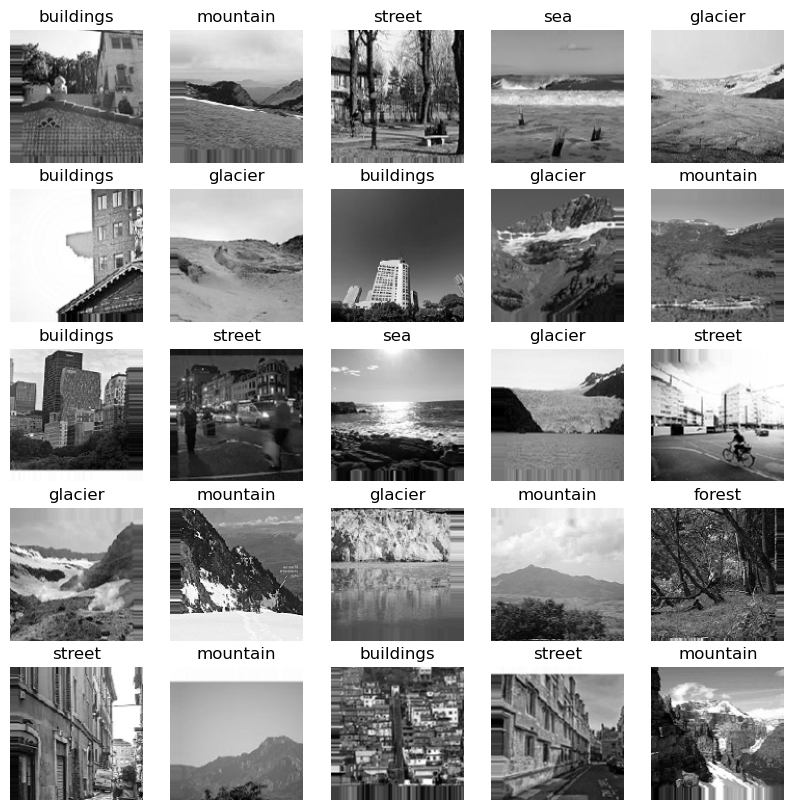

In [5]:
batch = next(train_generator)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(batch[0][i], cmap='gray')  
    label_idx = batch[1][i].argmax()      
    label_map = {v: k for k, v in train_generator.class_indices.items()}  
    ax.set_title(label_map[label_idx])    
    ax.axis('off')                        
plt.show()  

# Creating a Convolutional Neural Network (CNN) for Image Classification

In [7]:
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation='relu'))  
model.add(Dense(6, activation='softmax')) 
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 124, 124, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      62,980,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,001,094 (240.33 MB)

 Trainable params: 63,000,902 (240.33 MB)

 Non-trainable params: 192 (768.00 B)

# Training a Convolutional Neural Network with Model Checkpointing

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='model.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)


history = model.fit(
    train_generator,
    batch_size=64,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)


Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4646 - loss: 3.1016
Epoch 1: val_accuracy improved from -inf to 0.18117, saving model to model.weights.h5
176/176 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.4649 - loss: 3.0944 - val_accuracy: 0.1812 - val_loss: 10.2212
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6249 - loss: 1.0169
Epoch 2: val_accuracy improved from 0.18117 to 0.29030, saving model to model.weights.h5
176/176 ━━━━━━━━━━━━━━━━━━━━ 484s 3s/step - accuracy: 0.6250 - loss: 1.0167 - val_accuracy: 0.2903 - val_loss: 8.6102
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6692 - loss: 0.8685
Epoch 3: val_accuracy improved from 0.29030 to 0.54601, saving model to model.weights.h5
176/176 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.6693 - loss: 0.8685 - val_accuracy: 0.5460 - val_loss: 1.9200
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6876 - loss: 0.8490
Epoch 4: val_accuracy improved from 0.546

# Evaluating Model Performance on Validation Data

In [9]:
# Generate generalization metrics
validation_loss, validation_acc = model.evaluate(validation_generator)
print('Validation loss:', validation_loss, '\t Validation accuracy:', validation_acc)

44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 301ms/step - accuracy: 0.7451 - loss: 0.6945
Validation loss: 0.6591269969940186 	 Validation accuracy: 0.7624821662902832


# Training and Validation Loss Visualization

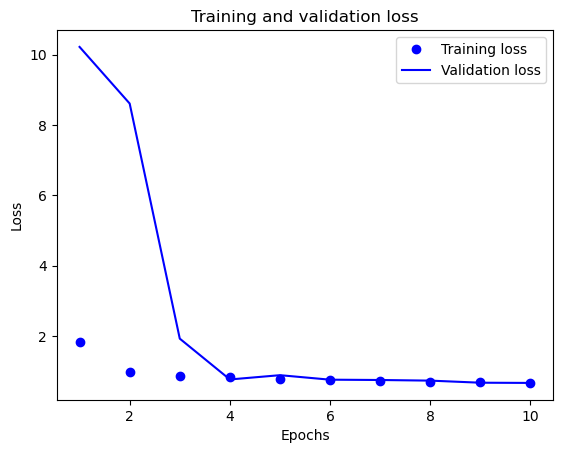

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Accuracy Visualization

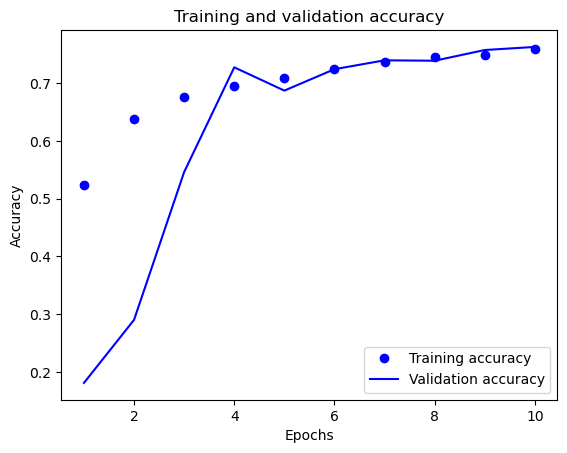

In [11]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion matrix

44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 273ms/step


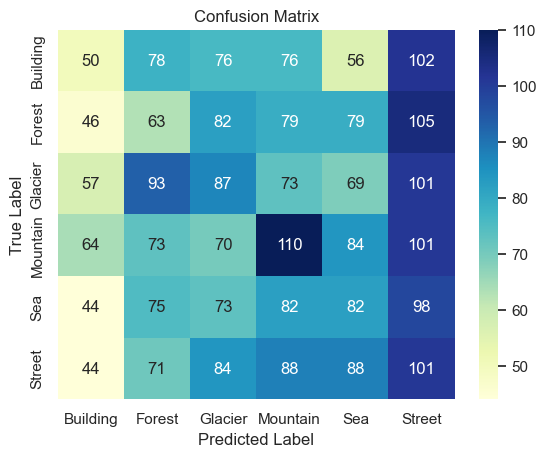

In [12]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix


validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)


confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = ['Building', 'Forest', 'Glacier', 'Mountain', 'Sea', 'Street']
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Checking Model Prediction on Test Image

## Test Image of Buildings

In [47]:
img_path = r"C:\Users\sm983\Desktop\Capstone-2 projects\CNN_Intel_Classification\seg_test\seg_test\buildings\20113.jpg"
img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.  
prediction = model.predict(img_array)  
label_map = {v:k for k,v in train_generator.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)]  
print(" prediction of this image is", predicted_label) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
 prediction of this image is buildings


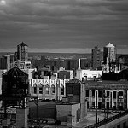

In [48]:
img

## Test Image of Glacier

In [50]:
img_path = r"C:\Users\sm983\Desktop\Capstone-2 projects\CNN_Intel_Classification\seg_test\seg_test\glacier\20310.jpg"
img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.  
prediction = model.predict(img_array)  
label_map = {v:k for k,v in train_generator.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)]  
print(" prediction of this image is", predicted_label) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
 prediction of this image is glacier


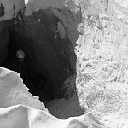

In [51]:
img

## Test Image of Forest

In [52]:
img_path = r"C:\Users\sm983\Desktop\Capstone-2 projects\CNN_Intel_Classification\seg_test\seg_test\forest\20411.jpg"
img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.  
prediction = model.predict(img_array)  
label_map = {v:k for k,v in train_generator.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)]  
print(" prediction of this image is", predicted_label) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
 prediction of this image is forest


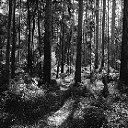

In [53]:
img

## Test Image of Mountain

In [56]:
img_path = r"C:\Users\sm983\Desktop\Capstone-2 projects\CNN_Intel_Classification\seg_test\seg_test\mountain\20613.jpg"
img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.  
prediction = model.predict(img_array)  
label_map = {v:k for k,v in train_generator.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)]  
print(" prediction of this image is", predicted_label) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
 prediction of this image is mountain


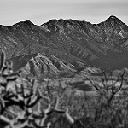

In [57]:
img

## Test Image of Sea

In [58]:
img_path = r"C:\Users\sm983\Desktop\Capstone-2 projects\CNN_Intel_Classification\seg_test\seg_test\sea\20106.jpg"
img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.  
prediction = model.predict(img_array)  
label_map = {v:k for k,v in train_generator.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)]  
print(" prediction of this image is", predicted_label) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
 prediction of this image is sea


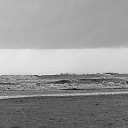

In [59]:
img

## Test Image of Street

In [60]:
img_path = r"C:\Users\sm983\Desktop\Capstone-2 projects\CNN_Intel_Classification\seg_test\seg_test\street\20137.jpg"
img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')  
img_array = image.img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.  
prediction = model.predict(img_array)  
label_map = {v:k for k,v in train_generator.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)]  
print(" prediction of this image is", predicted_label) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
 prediction of this image is street


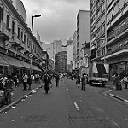

In [61]:
img